# 📊 Exploratory Data Analysis (EDA)
## Credit Card Fraud Detection

**Objective:** Identify patterns that differentiate fraudulent from legitimate transactions

**Analysis:**
1. Transaction Amount Analysis
2. Feature Importance & Correlations
3. Time-Based Fraud Patterns

## 1. Setup

In [1]:
# Import libraries
import sys
import os
sys.path.append(os.path.abspath('../src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Import data loader
from data.load_data import load_data

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline
pd.set_option('display.max_columns', None)

print("✓ Setup complete")

✓ Setup complete


## 2. Load Data

In [2]:
# Load dataset
X, y = load_data()
df = X.copy()
df['Class'] = y

print(f"Dataset shape: {df.shape}")
print(f"\nClass distribution:")
print(y.value_counts())
print(f"\nFraud rate: {y.mean()*100:.2f}%")

Loading data from: c:\Users\RONO\Documents\GitHub\end-to-end-fraud_detection_system\data\raw\creditcard.csv
Data loaded successfully!
Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

DATASET SUMMARY
Total Transactions: 284,807
Total Features: 30
Fraudulent Transactions: 492 (0.17%)
Legitimate Transactions: 284,315
Missing Values: 0
Duplicate Rows: 1081

Dataset shape: (284807, 31)

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud rate: 0.17%


## 3. Transaction Amount Analysis

Amount Statistics:

Legitimate - Mean: $88.29, Median: $22.00
Fraud      - Mean: $122.21, Median: $9.25


C:\Users\RONO\AppData\Local\Temp\ipykernel_3004\2622802579.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([legit['Amount'], fraud['Amount']], labels=['Legitimate', 'Fraud'])


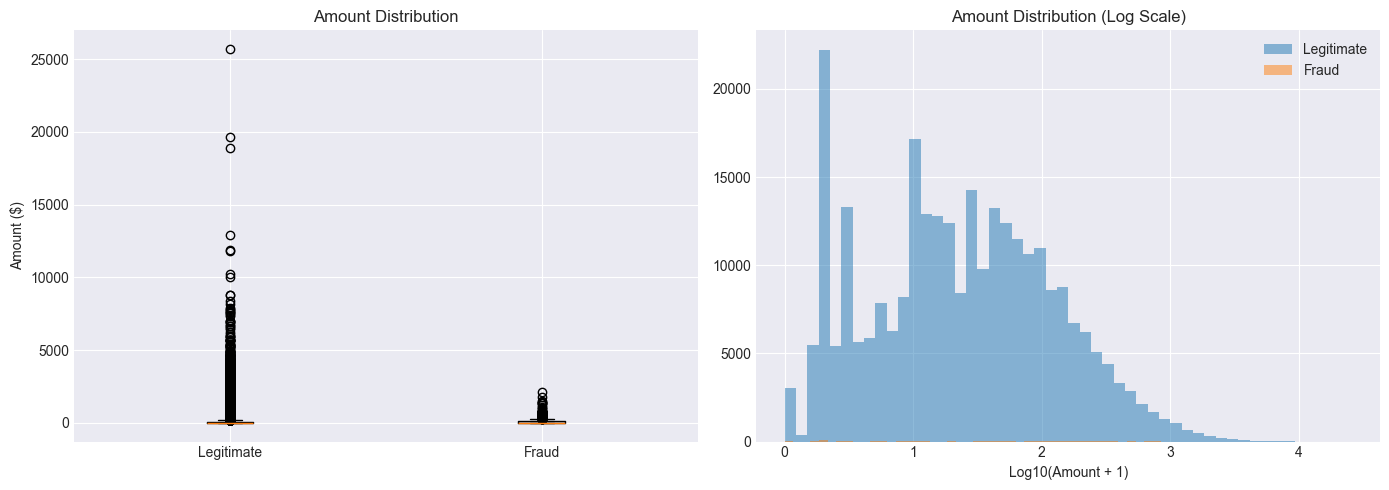

In [3]:
# Compare amounts between fraud and legitimate
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

print("Amount Statistics:")
print(f"\nLegitimate - Mean: ${legit['Amount'].mean():.2f}, Median: ${legit['Amount'].median():.2f}")
print(f"Fraud      - Mean: ${fraud['Amount'].mean():.2f}, Median: ${fraud['Amount'].median():.2f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
axes[0].boxplot([legit['Amount'], fraud['Amount']], labels=['Legitimate', 'Fraud'])
axes[0].set_title('Amount Distribution')
axes[0].set_ylabel('Amount ($)')

# Histogram (log scale)
axes[1].hist(np.log10(legit['Amount'] + 1), bins=50, alpha=0.5, label='Legitimate')
axes[1].hist(np.log10(fraud['Amount'] + 1), bins=50, alpha=0.5, label='Fraud')
axes[1].set_title('Amount Distribution (Log Scale)')
axes[1].set_xlabel('Log10(Amount + 1)')
axes[1].legend()

plt.tight_layout()
plt.show()

## 4. Feature Correlations

Top 10 Features Correlated with Fraud:
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64


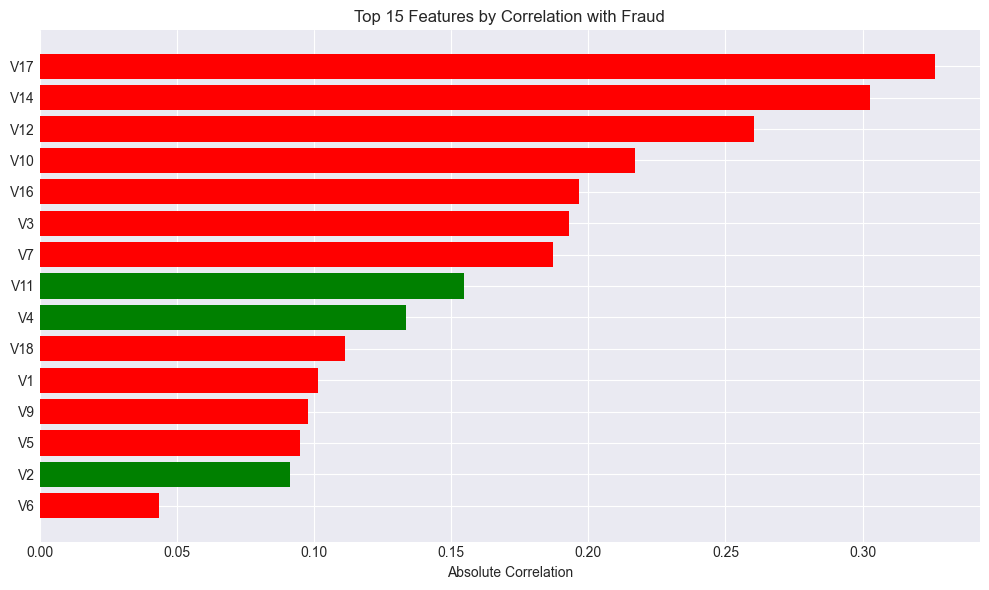

In [4]:
# Calculate correlations with fraud
correlations = df.corr()['Class'].drop('Class').sort_values(ascending=False)

print("Top 10 Features Correlated with Fraud:")
print(correlations.head(10))

# Visualize top correlations
plt.figure(figsize=(10, 6))
top_corr = correlations.abs().sort_values(ascending=False).head(15)
colors = ['green' if correlations[f] > 0 else 'red' for f in top_corr.index]
plt.barh(range(len(top_corr)), top_corr.values, color=colors)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Absolute Correlation')
plt.title('Top 15 Features by Correlation with Fraud')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5. Feature Importance (Random Forest)

Training Random Forest...

Top 10 Important Features:
   Feature  Importance
14     V14    0.182091
10     V10    0.134167
12     V12    0.108858
17     V17    0.108597
16     V16    0.083521
11     V11    0.057427
3       V3    0.056403
4       V4    0.050366
2       V2    0.034595
9       V9    0.029124


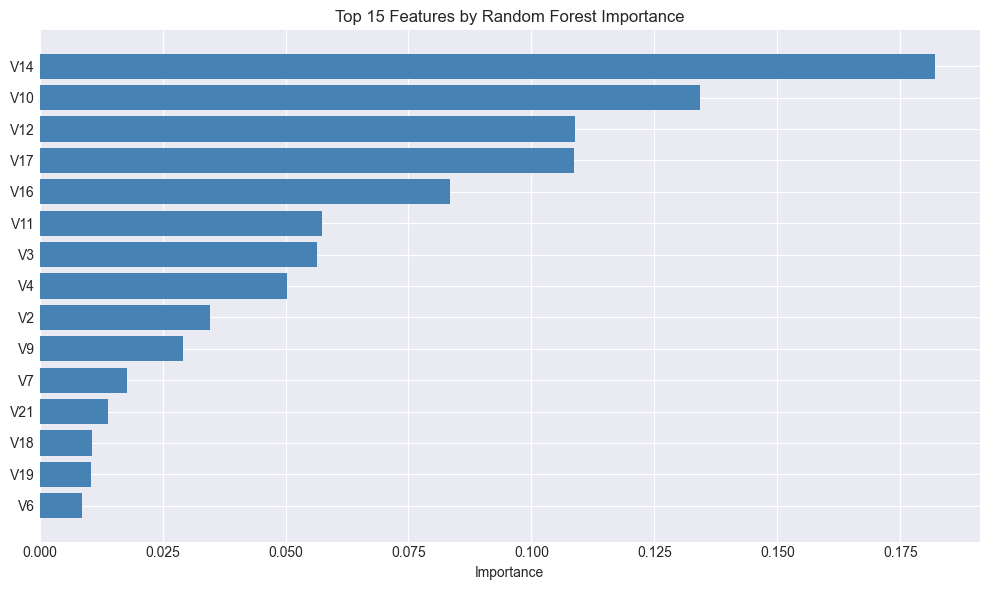

In [5]:
# Train Random Forest to get feature importance
print("Training Random Forest...")

# Use balanced sample for faster training
fraud_sample = df[df['Class'] == 1]
legit_sample = df[df['Class'] == 0].sample(n=len(fraud_sample)*5, random_state=42)
sample = pd.concat([fraud_sample, legit_sample])

X_sample = sample.drop('Class', axis=1)
y_sample = sample['Class']

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_sample, y_sample)

# Get feature importance
importance = pd.DataFrame({
    'Feature': X_sample.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance.head(10))

# Visualize
plt.figure(figsize=(10, 6))
top_15 = importance.head(15)
plt.barh(range(len(top_15)), top_15['Importance'].values, color='steelblue')
plt.yticks(range(len(top_15)), top_15['Feature'].values)
plt.xlabel('Importance')
plt.title('Top 15 Features by Random Forest Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 6. Time-Based Analysis

Time range: 0.0 to 48.0 hours
Duration: 2.0 days


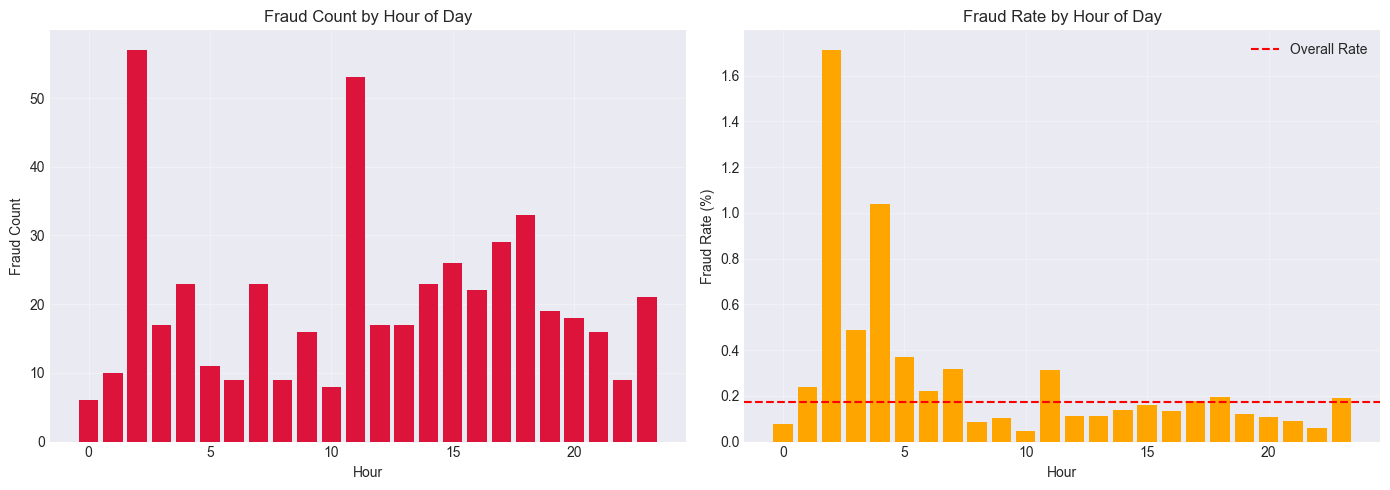

In [6]:
# Convert time to hours
df['Time_Hours'] = df['Time'] / 3600

print(f"Time range: {df['Time_Hours'].min():.1f} to {df['Time_Hours'].max():.1f} hours")
print(f"Duration: {df['Time_Hours'].max()/24:.1f} days")

# Analyze fraud by hour of day
df['Hour'] = (df['Time_Hours'] % 24).astype(int)
fraud_by_hour = df.groupby('Hour')['Class'].agg(['sum', 'count', 'mean'])
fraud_by_hour.columns = ['Fraud_Count', 'Total', 'Fraud_Rate']

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fraud count by hour
axes[0].bar(fraud_by_hour.index, fraud_by_hour['Fraud_Count'], color='crimson')
axes[0].set_title('Fraud Count by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Fraud Count')
axes[0].grid(alpha=0.3)

# Fraud rate by hour
axes[1].bar(fraud_by_hour.index, fraud_by_hour['Fraud_Rate']*100, color='orange')
axes[1].axhline(y=df['Class'].mean()*100, color='red', linestyle='--', label='Overall Rate')
axes[1].set_title('Fraud Rate by Hour of Day')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Fraud Rate (%)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Key Insights

In [7]:
print("="*60)
print("KEY FINDINGS")
print("="*60)

print("\n1. TRANSACTION AMOUNTS:")
print(f"   - Fraud transactions have {'LOWER' if fraud['Amount'].mean() < legit['Amount'].mean() else 'HIGHER'} average amounts")
print(f"   - Fraud mean: ${fraud['Amount'].mean():.2f}")
print(f"   - Legit mean: ${legit['Amount'].mean():.2f}")

print("\n2. IMPORTANT FEATURES:")
print("   Top 5 features for fraud detection:")
for i, row in importance.head(5).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")

print("\n3. TIME PATTERNS:")
peak_hour = fraud_by_hour['Fraud_Count'].idxmax()
print(f"   - Peak fraud hour: {peak_hour}:00")
print(f"   - Fraud shows temporal patterns")

print("\n4. DATA CHARACTERISTICS:")
print(f"   - Highly imbalanced: {(1-y.mean())*100:.2f}% legitimate")
print(f"   - Need to handle imbalance in modeling")

print("\n" + "="*60)
print("RECOMMENDATIONS FOR MODELING")
print("="*60)
print("\n1. Use SMOTE or class weights for imbalance")
print("2. Focus on top 15-20 features")
print("3. Scale Time and Amount features")
print("4. Use Precision-Recall metrics (not accuracy)")
print("\n✓ EDA Complete!")

KEY FINDINGS

1. TRANSACTION AMOUNTS:
   - Fraud transactions have HIGHER average amounts
   - Fraud mean: $122.21
   - Legit mean: $88.29

2. IMPORTANT FEATURES:
   Top 5 features for fraud detection:
   - V14: 0.1821
   - V10: 0.1342
   - V12: 0.1089
   - V17: 0.1086
   - V16: 0.0835

3. TIME PATTERNS:
   - Peak fraud hour: 2:00
   - Fraud shows temporal patterns

4. DATA CHARACTERISTICS:
   - Highly imbalanced: 99.83% legitimate
   - Need to handle imbalance in modeling

RECOMMENDATIONS FOR MODELING

1. Use SMOTE or class weights for imbalance
2. Focus on top 15-20 features
3. Scale Time and Amount features
4. Use Precision-Recall metrics (not accuracy)

✓ EDA Complete!


## 8. Save Results

In [8]:
# Save feature importance for later use
output_dir = '../data/processed'
os.makedirs(output_dir, exist_ok=True)

importance.to_csv(f'{output_dir}/feature_importance.csv', index=False)
correlations.to_csv(f'{output_dir}/feature_correlations.csv')

print("✓ Results saved to data/processed/")
print("  - feature_importance.csv")
print("  - feature_correlations.csv")

✓ Results saved to data/processed/
  - feature_importance.csv
  - feature_correlations.csv
